In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import seaborn as sns


In [2]:
train = torch.load("X_train.p")
test = torch.load("X_test.p")


In [3]:
print(train.shape, train.dtype)
print(test.shape, test.dtype)


torch.Size([3135, 41, 10]) torch.float32
torch.Size([3135, 6, 10]) torch.float32


In [104]:
def whiten(A, pipeline=None):
    from sklearn.decomposition import PCA
    from sklearn.preprocessing import RobustScaler
    from sklearn.pipeline import Pipeline

    shape = A.shape
    A = A.reshape(-1, A.shape[-1])

    if not pipeline:
        pipeline = Pipeline(
            [
                ("scale", RobustScaler()),
                ("pca", PCA(n_components=min(A.shape[0], A.shape[1]))),
            ]
        ).fit(A)
    return torch.tensor(pipeline.transform(A).reshape(shape)), pipeline


In [5]:
def pp(A):
    A = A.reshape(-1, A.size(-1))
    print("ok")
    A = A[torch.randint(0, A.size(0), (100,)), :]
    
    print(A.shape)
    sns.pairplot(pd.DataFrame(A), diag_kind='kde')


In [6]:
# train = train.reshape(-1, train.size(-1))
# test = test.reshape(-1, train.size(-1))
# train[:, 1:], pipeline = whiten(train[:, 1:])
# test[:, 1:], pipeline = whiten(test[:, 1:])

In [108]:
whiten(test)[0].shape

torch.Size([3135, 6, 10])

In [15]:
from data import month_number, mmmyy_to_yyyymmdd

In [99]:
from data import T_AVAILABLE, T_PREDICT, FEATURE_NAMES
from tqdm import tqdm

In [100]:
def build_big(other_features: dict, cfips: list):
    arr = torch.load("big.p")
    print(len(cfips), "cfips")
    for c in tqdm(cfips):
        for i in range(arr.shape[1]):
            for t in range(arr.shape[0]):
                other_features[(c, f"big_{i}", t)] = arr[t, i]

In [101]:
other_features = dict()
census = pd.read_csv("census_starter.csv").set_index("cfips")
arr = build_big(other_features, census.index)

3142 cfips


100%|██████████| 3142/3142 [00:23<00:00, 131.82it/s]


In [86]:
# torch.save(new_arr, "big.p")

In [87]:
# arr = torch.load("big.p")

In [81]:
arr = arr[:, 1:35].clone()

In [82]:
new_arr = arr.clone()
new_arr[6:, :] = arr[:-6, :].clone()

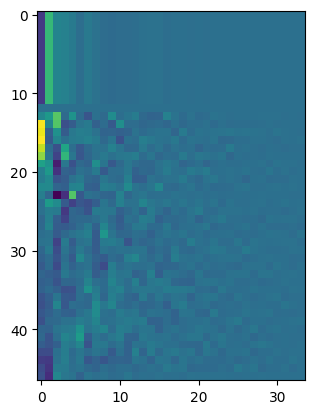

In [88]:
# pp(torch.tensor(arr[:, :5]))
# arr[:, :35].std(dim=0)
plt.imshow(arr)